## Teste t para uma Amostra

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [7]:
enem_sp.tail()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
499935,"1,90E+11",São Paulo,18,F,1,parda,1,1,não_respondeu,NaN,...,479.1,Espanhol,1.0,100.0,120.0,120.0,140.0,100.0,580.0,Sim
499936,"1,90E+11",São Paulo,17,F,1,preta,1,2,pública,35925457.0,...,43.2,Espanhol,1.0,80.0,120.0,140.0,120.0,100.0,560.0,Sim
499937,"1,90E+11",São Paulo,17,F,1,parda,1,2,pública,35001156.0,...,487.3,Inglês,1.0,120.0,80.0,60.0,120.0,0.0,380.0,Sim
499938,"1,90E+11",São Paulo,17,M,1,parda,1,2,pública,NaN,...,401.1,Inglês,1.0,160.0,120.0,160.0,140.0,160.0,740.0,Não
499939,"1,90E+11",Araras,18,F,1,branca,1,2,pública,35019926.0,...,559.5,Inglês,1.0,120.0,120.0,120.0,120.0,140.0,620.0,Sim


In [11]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35019926.0]

In [12]:
colegioy.shape

(116, 28)

In [13]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
8722,"1,90E+11",Araras,18,F,1,branca,1,2,pública,35019926.0,...,437.5,Inglês,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
11642,"1,90E+11",Araras,17,F,1,branca,1,2,pública,35019926.0,...,636.1,Inglês,1.0,140.0,120.0,140.0,120.0,140.0,660.0,Sim
17760,"1,90E+11",Araras,18,F,1,branca,1,2,pública,35019926.0,...,685.7,Espanhol,1.0,160.0,120.0,140.0,120.0,140.0,680.0,Sim
18261,"1,90E+11",Araras,18,M,1,parda,1,2,pública,35019926.0,...,65.9,Inglês,1.0,160.0,160.0,140.0,180.0,180.0,820.0,Sim
18362,"1,90E+11",Araras,17,F,1,branca,1,2,pública,35019926.0,...,571.5,Espanhol,1.0,160.0,120.0,120.0,120.0,120.0,640.0,Sim


1) Analisar a classificação das variáveis

In [14]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [15]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [16]:
import seaborn as sns

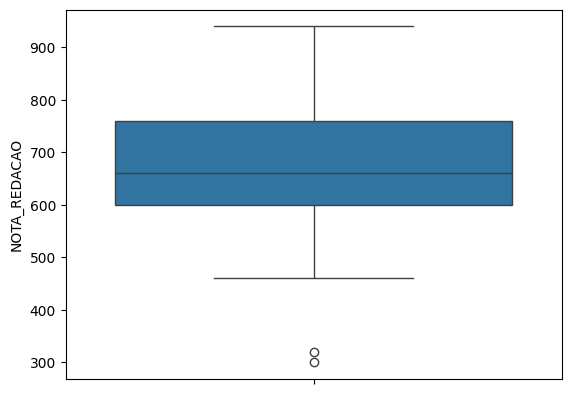

In [17]:
grafico = sns.boxplot(colegioy, y="NOTA_REDACAO")


4) Analisar Normalidade

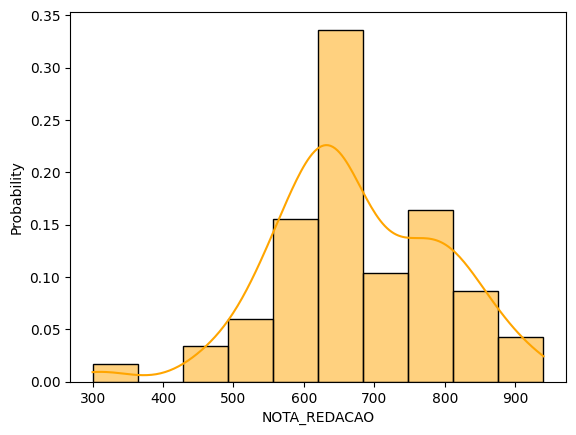

In [18]:
sns.histplot(colegioy, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

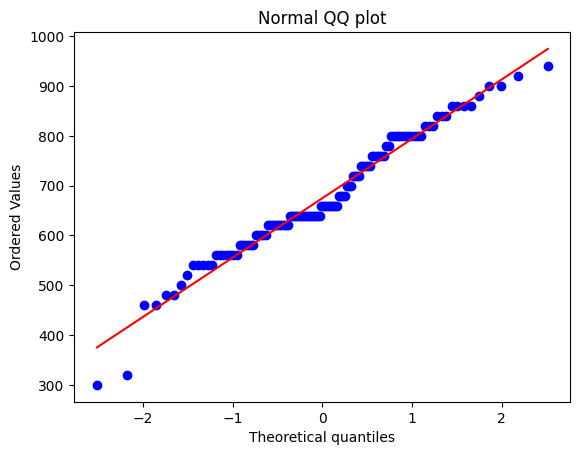

In [20]:
stats.probplot(colegioy['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [21]:
# Teste Shapiro-Wilk
stats.shapiro(colegioy.NOTA_REDACAO)

ShapiroResult(statistic=np.float64(0.9745297837573323), pvalue=np.float64(0.026141514999179147))

In [22]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [23]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioy.NOTA_REDACAO, dist = 'norm')

(np.float64(0.11850395226532423), np.float64(0.0009999999999998899))

In [24]:
# Teste Anderson-Darling
stats.anderson(colegioy.NOTA_REDACAO, 'norm')

AndersonResult(statistic=np.float64(1.0485125064531502), critical_values=array([0.558, 0.635, 0.762, 0.889, 1.057]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(674.8275862068965), scale=np.float64(119.10158439876798))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## TESTE t

Média das notas do colégio Y, comparada a média do Estado de São Paulo.

Ho = média é igual a de São Paulo : p > 0.05

Ha = média é diferente da de São Paulo : p <= 0.05

In [25]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [26]:
import scipy.stats as stats

In [27]:
stat, p = stats.ttest_1samp(colegioy['NOTA_REDACAO'], popmean=593.018)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 7.4
p-valor: 0.0


In [28]:
colegioy.NOTA_REDACAO.describe()

count    116.000000
mean     674.827586
std      119.101584
min      300.000000
25%      600.000000
50%      660.000000
75%      760.000000
max      940.000000
Name: NOTA_REDACAO, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: t = 7,4

p_valor = 0.0


